In [1]:
# red mission

In [2]:
# web scrapping

# Visit the site and see if you can gather any evidence indicating the location of the rogue agents.

website = 'https://www.thegoldbugs.com'

In [3]:
import requests

# getting a request from website
res = requests.get('https://www.thegoldbugs.com/blog')

import bs4

# making a soup to figure out things
soup = bs4.BeautifulSoup(res.text,'lxml')

In [4]:
# extracting only text
my_text = soup.select('.sqs-block-content')[0].getText()

In [5]:
# getting address by a hint given in the title
my_address = ''

for line in my_text.split('-----')[1:]:
    
    my_address += line[0]

In [6]:
my_address

'https://drive.google.com/open?id=1k4uU9l6G19Q4hPwmjHsNLdPvnKs7YjNoxJLkT5Oy4u4'

In [7]:
# orange mission

In [8]:
# Using the hidden link in the blog post, it looks like we have a new riddle to solve. 
# Download and unzip the file from the link.

# Let's see what we can figure out from it.

In [9]:
import zipfile

In [10]:
# extracting files from zip

zip_obj = zipfile.ZipFile('unzip_me_for_instructions.zip','r')

In [11]:
zip_obj.extractall('unzipped_content')

In [12]:
# see what is in there

import os

# os.listdir("C:\\Users\\omerf\\unzipped_content")

In [13]:
# os.getcwd()

In [14]:
my_folder = "C:\\Users\\omerf\\unzipped_content"

In [15]:
import re

In [16]:
pattern = r'https://[-?_=./\w]+'

In [17]:
def search(file,pattern= r'https://[-?_=./\w]+'):
    f = open(file,'r')
    text = f.read()
    
    if re.search(pattern,text):
        return re.search(pattern,text)
    else:
        return ''
    
results = []
for folder, subfolders, files in os.walk(my_folder):
    
    for file in files:
        fullpath = folder+'\\'+file
        
        results.append(search(fullpath)) 

In [18]:
for address in results:
    if address!='':
        print(address.group())

https://drive.google.com/open?id=1tWJBFrSQL06qTZgkohs4t_a5Cu84AheLo
https://docs.google.com/document/d/1tWJBFrSQL06qTZgkohs4t_a5Cu84AheLocWTXQ-DcxM/edit?usp=sharing
https://drive.google.com/file/d/17nJm_El0aGsNvaMZtnY7FajaogRviwja/view?usp=sharing


In [19]:
# addresse above includes a csv and a pdf file. yellow mission is to examine them.

In [20]:
# yellow mission

In [21]:
# Using the Python csv library and following the previous instructions for the file, 
# we wanted to crab every element from the 3rd column (index 2) and concatenate them 
# together to get a link for a pdf file that contains an email contact.

In [22]:
import csv

In [23]:
f = open('download_link.csv','r')

In [24]:
csv_file = csv.reader(f)

In [25]:
address = ''

for line in csv_file:
    address+=line[2]

In [26]:
address

'https://drive.google.com/file/d/14oSxiKv35enpyyr81dDqEhkwnUONghPQ/'

In [27]:
# We can open new tabs or windows with python 

import webbrowser

In [28]:
webbrowser.open_new_tab(address)

True

In [29]:
# getting contact e mail information from pdf file with regular expressions

In [30]:
import PyPDF2

In [31]:
f = open('Contact_Email_Information.pdf','rb')

In [32]:
pdf = PyPDF2.PdfFileReader(f)

In [33]:
nums_pages = pdf.numPages

In [34]:
for i in range(nums_pages):
    page = pdf.getPage(i)
    text = page.extractText()
    
    match = re.search(r'[\w.-]+@[\w.-]+(.com|.net|.org)',text)
    
    if match:
        print(match.group())

info@thegoldbugs.com


In [35]:
# green mission

In [36]:
# Let's try sending an email to info@thegoldbugs.com and see if we get a reply:

In [37]:
import smtplib
smtp_object = smtplib.SMTP('smtp.gmail.com',587)
smtp_object.ehlo()
smtp_object.starttls()

(220, b'2.0.0 Ready to start TLS')

In [38]:
import getpass
email = getpass.getpass("Enter your email: ")
password = getpass.getpass("Enter your password: ")
smtp_object.login(email,password)

Enter your email: ········
Enter your password: ········


(235, b'2.7.0 Accepted')

In [39]:
from_address = getpass.getpass("Enter your email: ")
to_address = getpass.getpass("Enter the email of the recipient: ")
subject = 'Resistance'
message = 'I want more information'
msg = "Subject: " + subject + '\n' + message
smtp_object.sendmail(from_address,to_address,msg)

Enter your email: ········
Enter the email of the recipient: ········


{}

In [40]:
smtp_object.quit()

(221, b'2.0.0 closing connection h2sm4756624ljb.45 - gsmtp')

In [41]:
# check for reply

In [42]:
import imaplib
import getpass

In [43]:
M = imaplib.IMAP4_SSL('imap.gmail.com')

In [44]:
user = input("Enter your email: ")

Enter your email: omerfkarabey@gmail.com


In [45]:
password = getpass.getpass("Enter your password: ")

Enter your password: ········


In [46]:
M.login(user,password)

('OK', [b'omerfkarabey@gmail.com authenticated (Success)'])

In [47]:
# Connect to your inbox
M.select("inbox")

('OK', [b'343'])

In [48]:
typ ,data = M.search(None,'FROM info@thegoldbugs.com')

In [49]:
typ

'OK'

In [50]:
data

[b'334']

In [51]:
result, email_data = M.fetch('334',"(RFC822)")

In [52]:
raw_email = email_data[0][1]

In [53]:
raw_email_string = raw_email.decode('utf-8')

In [54]:
import email

In [55]:
email_message = email.message_from_string(raw_email_string)

In [56]:
import pprint

In [57]:
for part in email_message.walk():
    if part.get_content_type() == 'text/html':
        body = part.get_payload(decode=True)
        print(body)


b'<div dir="ltr">If you are reading this message, you were able to find the email from the PDF using the CSV file.<div><br></div><div>Here is what you will need for the next phase:</div><div><br></div><div><span style="font-size:12.8px"><a href="https://drive.google.com/file/d/15YyLqIuGlsCLr4ioKUeHRw8H2QjBNOz2/view?usp=sharing" target="_blank">https://drive.google.com/file/d/15YyLqIuGlsCLr4ioKUeHRw8H2QjBNOz2/view?usp=sharing</a></span><br></div><div><span style="font-size:12.8px"><br></span></div><div><span style="font-size:12.8px"><a href="https://drive.google.com/file/d/128MRLNuytoW7dVm6B7AF_cDVMeACyTFk/view?usp=sharing" target="_blank">https://drive.google.com/file/d/128MRLNuytoW7dVm6B7AF_cDVMeACyTFk/view?usp=sharing</a></span><br></div><div><br></div><div><br></div></div>\r\n'


b'<div dir="ltr">If you are reading this message, you were able to find the email from the PDF using the CSV file.<div><br></div><div>Here is what you will need for the next phase:</div><div><br></div><div><span style="font-size:12.8px"><a href="https://drive.google.com/file/d/15YyLqIuGlsCLr4ioKUeHRw8H2QjBNOz2/view?usp=sharing" target="_blank">https://drive.google.com/file/d/15YyLqIuGlsCLr4ioKUeHRw8H2QjBNOz2/view?usp=sharing</a></span><br></div><div><span style="font-size:12.8px"><br></span></div><div><span style="font-size:12.8px"><a href="https://drive.google.com/file/d/128MRLNuytoW7dVm6B7AF_cDVMeACyTFk/view?usp=sharing" target="_blank">https://drive.google.com/file/d/128MRLNuytoW7dVm6B7AF_cDVMeACyTFk/view?usp=sharing</a></span><br></div><div><br></div><div><br></div></div>\r\n

In [58]:
# blue mission

In [59]:
# First we need to get the images to be the correct size so that our paste operation will line up. 
# Then we can use a transparency mask with an alpha value to find the hidden message. 
# We also need to resize the images so that they line up with each other.

In [60]:
from PIL import Image

In [61]:
image_link = Image.open('image_link.PNG')

In [64]:
cover_image = Image.open("cover_image.PNG")

In [65]:
image_link.size

(1226, 777)

In [66]:
cover_image.size

(1093, 693)

In [67]:
cover_image = cover_image.resize(image_link.size)

In [68]:
cover_image.putalpha(200)

In [69]:
image_link.paste(cover_image,(0,0),cover_image)

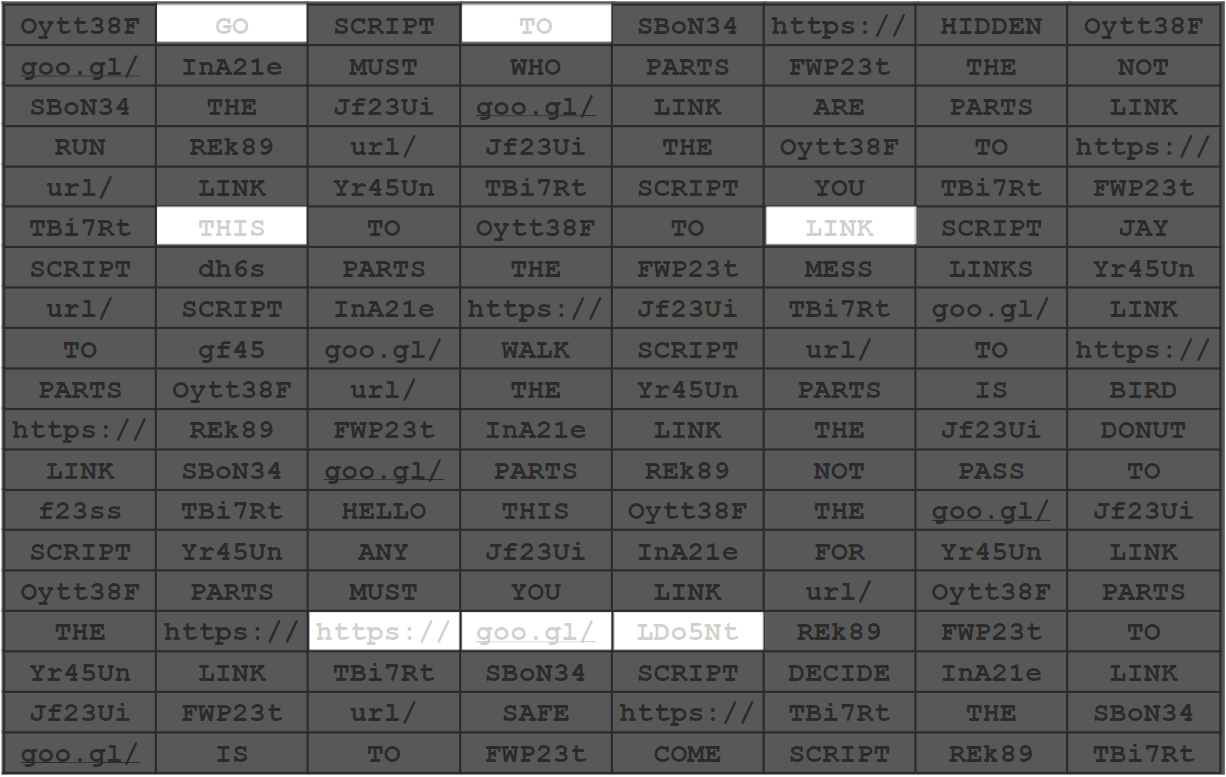

In [70]:
image_link

In [71]:
link = 'https://goo.gl/LDo5Nt'

In [72]:
# the text below is taken from the link above. 
# The task is to decrypt the encrypted text

In [73]:
text = b'gAAAAABaSsmdCFRxbqA6n-L0CMIMuhn26uGiIk5Wtx-V7wEPLBZYA67nGbNWyZziGyorwIlHqp3M5xrtzQj5tCab8XfBRCmdJXZYD1Fwp68AtD8WEMhblQ4I2DKDNFzqULH1DDETry3ptZnGZUgVo5gdDlnihqu1_oX-KboNpyRQ6J0DmeWTsm3L31btF_O6sX81rj3rBVI0qVuT7QdRT2burisQRnw5htA05llYgc1_fMkN_PSxCwY='


In [74]:
fermat_prime = b'65537'

In [75]:
# creating custom key

In [76]:
import hashlib

In [77]:
keyword = fermat_prime

In [78]:
key = hashlib.sha3_256(keyword)

In [79]:
key

In [80]:
key.digest()

b'\xaf\x85\xc2\xce\x06s\nGu\x8f\xba\xfcM\xd4)-\x91\x8f\x05\xe2V2\xf3\xba(\xd3\xb1s\xa4>\x9c\x05'

In [81]:
import base64

In [82]:
key_bytes = key.digest()

In [83]:
from cryptography.fernet import Fernet

In [84]:
fernet_key = base64.urlsafe_b64encode(key_bytes)

In [85]:
fernet_key

b'r4XCzgZzCkd1j7r8TdQpLZGPBeJWMvO6KNOxc6Q-nAU='

In [86]:
custom_cipher = Fernet(fernet_key)

In [87]:
encrypted_message = text

In [88]:
decrypted_message = custom_cipher.decrypt(text)

In [89]:
decrypted_message

b'The link you need to go to is: https://docs.google.com/document/d/1ksatYxKicml8lthbNo52LHwBET_ywt4TDSjHbKwwXHk/edit?usp=sharing'

In [90]:
# the link above take us into a new encryipted message. 

In [91]:
message = b'gAAAAABaUXStIpjRWJTrbWGOB45IyRpbb8Zyl1sdktcSeOL0zpH-_Oxd2nXVjeph_fGybthCci75lTd0z5SycthFo-5uoFxZqeBTdDc_n9uq3FdZk75gYFAWIRSGlAqlBQlcqkNhVx3W3w7rTaCAhCrHijeyTtxq53S3ab6fLHUw3KPHx2LtdurISe5ArhrmG9IOepnzGzBBTaTgCfoAmbITCWbp_5cdQQ=='

In [92]:
# Create the keyword string password
keyword = b'TRUTH'

In [93]:
key = hashlib.sha3_256(keyword)

In [94]:
# The bytes digest
key_bytes = key.digest()

# Encode the bytes digest
fernet_key = base64.urlsafe_b64encode(key_bytes)

In [95]:
custom_cipher = Fernet(fernet_key)

In [96]:
decrypted_mess = custom_cipher.decrypt(message)

In [97]:
decrypted_mess

b'https://docs.google.com/document/d/1KuyFxHfEi6bpBYRd0-lAIjNlLQhXEEva_fjZFhIY9DY/edit?usp=sharing'

In [98]:
# please check this e mail. this is the end of the story. to me, it was kind of unexpected ending and surprising. 